In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import tensorflow as tf

## How does the ImageDataGenerator works
### 1. Image is loaded from disk
### 2. Resized to target_size
### 3. transformations (shear,zoom,flip) from ImageDataGenerator are applied
### 4. Rescaling is done(like converting from 0-255 to 0-1)

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
datagen=ImageDataGenerator(rescale=1./255)

In [5]:
train_generator=datagen.flow_from_directory('../../dataset/training_set',target_size=(64,64),class_mode='binary')

Found 7115 images belonging to 2 classes.


In [6]:
test_generator=datagen.flow_from_directory('../../dataset/test_set',target_size=(64,64),class_mode='binary')

Found 496 images belonging to 2 classes.


In [7]:
train_generator

In [8]:
data,label=next(train_generator) # Generates 32 images and their labels from out training data
data.shape

(32, 64, 64, 3)

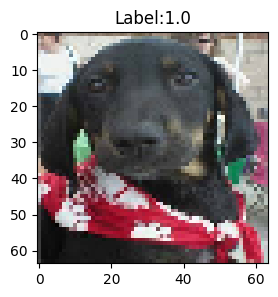

In [9]:
plt.figure(figsize=(3,3))
plt.imshow(data[20]) # Takes 32 images at one time
plt.title(f'Label:{label[20]}') # Take label of first image & show it as title of image
plt.show()

In [10]:
#convolution window
# filters: tells the no. of feature detectors
#kernel size : window
#input size: as we have 64x64 images with 3 shades (RGB)
#stride: overlapping matrics

In [11]:
cnn=tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid')) # Output layer

C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [13]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 813,217 (3.10 MB)

 Trainable params: 813,217 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

In [1]:
result=cnn.fit(x=train_generator,epochs=2)

NameError: name 'cnn' is not defined

In [2]:
cnn.evaluate(test_generator)

NameError: name 'cnn' is not defined

In [16]:
pred= cnn.predict(test_generator)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step


In [17]:
predicted_classes=[]
for x in pred:
    if (x>0.5):
        predicted_classes.append(1)
    else:
        predicted_classes.append(0)
print(predicted_classes)

[0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 

In [18]:
true_classes=test_generator.classes

In [19]:
# predict a new data
from keras.preprocessing import image
from keras.utils import load_img
from keras.utils import img_to_array
new_image=load_img('../../dataset/single_prediction/cat_or_dog_1.jpg',target_size=(64,64))

# convert the image object to array
new_image=img_to_array(new_image)
new_image=np.expand_dims(new_image,axis=0)
result=cnn.predict(new_image)
print(result)
if(result[0][0]>=0.5):
    prediction='dog'
else:
    prediction='cat'
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
[[1.]]


'dog'